In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['gender'] = np.where(df['sex']== 1, "male", "female")
df['hasHeartDisease'] = np.where(df['target']==1,0,1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,hasHeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,male,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,male,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,female,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,male,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,female,0


In [9]:
df[df['hasHeartDisease']==1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hasHeartDisease
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0,1.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0,1.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0,1.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0,1.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0,1.0


In [10]:
df[df['hasHeartDisease']==0].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hasHeartDisease
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0,0.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,0.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0,0.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0,0.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0,0.0


In [11]:
df[df['hasHeartDisease']==1]['trestbps'].mean()

134.3985507246377

In [12]:
df[df['hasHeartDisease']==0]['trestbps'].mean()

129.3030303030303

{'whiskers': [<matplotlib.lines.Line2D at 0x238cefd2e10>,
 'caps': [<matplotlib.lines.Line2D at 0x238cefdf7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x238cefd2cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x238cefe90f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x238cefe9550>],
 'means': []}

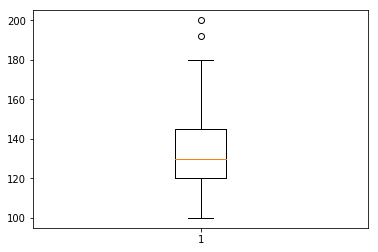

In [22]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df[df['hasHeartDisease']==1]['trestbps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x238cd8350b8>,
 'caps': [<matplotlib.lines.Line2D at 0x238cd825208>,
 'boxes': [<matplotlib.lines.Line2D at 0x238cd835a58>],
 'medians': [<matplotlib.lines.Line2D at 0x238cd6f8f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x238cd458588>],
 'means': []}

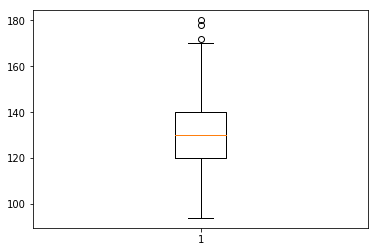

In [24]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df[df['hasHeartDisease']==0]['trestbps'])

In [28]:
stats.ttest_ind(df[df['hasHeartDisease']==1]['trestbps'],df[df['hasHeartDisease']==0]['trestbps'])

Ttest_indResult(statistic=2.5412927171039, pvalue=0.011546059200233312)

In [41]:
n1=len(df[df['hasHeartDisease']==1]['trestbps'])
n2=len(df[df['hasHeartDisease']==0]['trestbps'])
s1_square = math.pow(df[df['hasHeartDisease']==1]['trestbps'].var(),2)
s2_square = math.pow(df[df['hasHeartDisease']==0]['trestbps'].var(),2)
mean_1 = df[df['hasHeartDisease']==1]['trestbps'].mean()
mean_2 = df[df['hasHeartDisease']==0]['trestbps'].mean()
cohen_pooled_stan_dev = math.sqrt((((n1-1)*s1_square)+((n2-1)*s2_square))/(n1+n2-2))
cohens_d = (mean_1 - mean_2)/cohen_pooled_stan_dev
print(cohens_d)

0.01668555169000515


In [44]:
#Count the number with the disease for each gender type
hasDiseaseCount=df[df.hasHeartDisease==True].groupby("gender").count().hasHeartDisease

#Count the number of gender type
totalCount=df.groupby("gender").count()['hasHeartDisease']

#combine into a dataframe (both are indexed with gender, so will be matched) and specify the columns
p=pd.concat([hasDiseaseCount, totalCount], axis=1)
p.columns = ["heartDiseaseCount", "totalCount"]

#create a new column and calculate the proportion
p['propHeartDisease']=p["heartDiseaseCount"]/p["totalCount"]

#print the results
print(p.head())

        heartDiseaseCount  totalCount  propHeartDisease
gender                                                 
female                 24          96          0.250000
male                  114         207          0.550725
